A quick look at GAMA bulge and disk colours in multi-band GALAPAGOS fits versus single-band GALAPAGOS and SIGMA fits.

Pretty plots at the bottom.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0*1.3, 8*1.3)
plt.rcParams['font.size'] = 18*1.3

In [3]:
import pandas
#from galapagos_to_pandas import galapagos_to_pandas
## convert the GALAPAGOS data
#galapagos_to_pandas()
## convert the SIGMA data
#galapagos_to_pandas('/home/ppzsb1/projects/gama/qc/raw/StructureCat_SersicExp.fits',
#                    '/home/ppzsb1/quickdata/StructureCat_SersicExp.h5')

In [4]:
## read in GALAPAGOS data
## no attempt has been made to select only reliable bulges and discs
store = pandas.HDFStore('/home/ppzsb1/quickdata/GAMA_9_all_combined_gama_only_bd6.h5')
data = store['data'].set_index('CATAID')
print len(data)

51838


In [5]:
## read in SIGMA data - this is the raw sersic+exponential catalogue
## no attempt has been made here to select true two-component systems
store = pandas.HDFStore('/home/ppzsb1/quickdata/StructureCat_SersicExp.h5')
sigma = store['data'].set_index('CATAID')
print len(sigma)

3727


In [6]:
## get overlap between the catalogue objects
data = data.join(sigma, how='inner', rsuffix='_SIGMA')
len(data)

1273

In [7]:
## restrict to bright objects
data = data[data['MAG_GALFIT'] < 18.0]
len(data)

790

In [8]:
## band information
allbands = list('ugrizYJHK')
#band_wl = pandas.Series([3543,4770,6231,7625,9134,10395,12483,16313,22010], index=allbands)
normband = 'K'
bands = list('ugrizYJH')
band_labels = ['${}$'.format(i) for i in bands]
band_wl = pandas.Series([3543,4770,6231,7625,9134,10395,12483,16313], index=bands)
#normband = 'Z'
#bands = list('ugriYJHK')
#band_wl = numpy.array([3543,4770,6231,7625,10395,12483,16313,22010])

In [9]:
## extract magnitudes and use consistent column labels
mags_b = data[['MAG_GALFIT_BAND_B_{}'.format(b.upper()) for b in allbands]]
mags_d = data[['MAG_GALFIT_BAND_D_{}'.format(b.upper()) for b in allbands]]
mags_b_single = data[['SINGLE_MAG_GALFIT_B_{}'.format(b.upper()) for b in allbands]]
mags_d_single = data[['SINGLE_MAG_GALFIT_D_{}'.format(b.upper()) for b in allbands]]
mags_b_sigma = data[['GALMAG_01_{}'.format(b) for b in allbands]]
mags_d_sigma = data[['GALMAG_02_{}'.format(b) for b in allbands]]
mags_b.columns = mags_d.columns = allbands
mags_b_single.columns = mags_d_single.columns = allbands
mags_b_sigma.columns = mags_d_sigma.columns = allbands

In [10]:
## normalise SEDs and select only objects for which all magnitudes are sensible
def get_normsed(mags, bands, normband):
    normsed = mags[bands]
    normsed = normsed.sub(mags[normband], axis='index')
    good = ((normsed > -50) & (normsed < 50)).T.all()
    good &= ((mags[normband] > -50) & (mags[normband] < 50))
    return normsed, good

In [11]:
## get normalised SEDs
normsed_b, good_b = get_normsed(mags_b, bands, normband)
normsed_b_single, good_b_single = get_normsed(mags_b_single, bands, normband)
normsed_b_sigma, good_b_sigma = get_normsed(mags_b_sigma, bands, normband)
normsed_d, good_d = get_normsed(mags_d, bands, normband)
normsed_d_single, good_d_single = get_normsed(mags_d_single, bands, normband)
normsed_d_sigma, good_d_sigma = get_normsed(mags_d_sigma, bands, normband)
print len(normsed_d)

790


In [12]:
## restrict sample to set of object that are good in all three catalogues
good_b &= good_b_single & good_b_sigma
good_d &= good_d_single & good_d_sigma
normsed_b_single = normsed_b_single[good_b]
normsed_d_single = normsed_d_single[good_d]
normsed_b_sigma = normsed_b_sigma[good_b]
normsed_d_sigma = normsed_d_sigma[good_d]
normsed_b = normsed_b[good_b]
normsed_d = normsed_d[good_d]
print len(normsed_d)

412


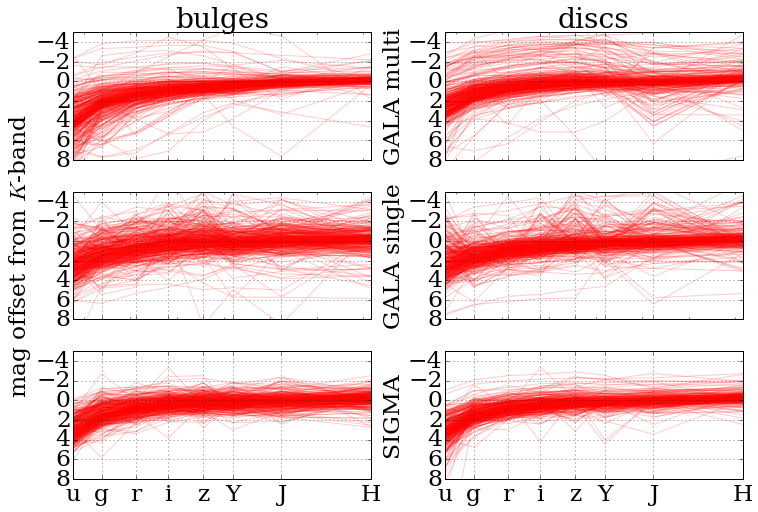

In [13]:
## overlay all SEDS

def plot_labels(i, label):
    if i == 1:
        plt.title('bulges')
    if i == 2:
        plt.title('discs')
    if i == 3:
        plt.ylabel('mag offset from $K$-band')
    if i % 2 == 0:
        plt.ylabel(label)

fig = plt.figure(figsize=(12,8))
def plot(d, label):
    if not hasattr(plot, "plotnum"):
        plot.plotnum = 0
    plot.plotnum += 1
    ax = plt.subplot(3, 2, plot.plotnum)
    d.T.plot(ax=ax, x=band_wl, ylim=(5,-2), legend=False, color='r', alpha=0.2)
    ax.xaxis.set_ticks(band_wl)
    ax.xaxis.set_ticklabels(bands)
    plot_labels(plot.plotnum, label)
    plt.axis(ymin=8, ymax=-5)

plot(normsed_b, 'GALA multi')
plot(normsed_d, 'GALA multi')
plot(normsed_b_single, 'GALA single')
plot(normsed_d_single, 'GALA single')
plot(normsed_b_sigma, 'SIGMA')
plot(normsed_d_sigma, 'SIGMA')
plt.subplots_adjust(wspace=0.25, hspace=0.25)

/home/ppzsb1/software/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


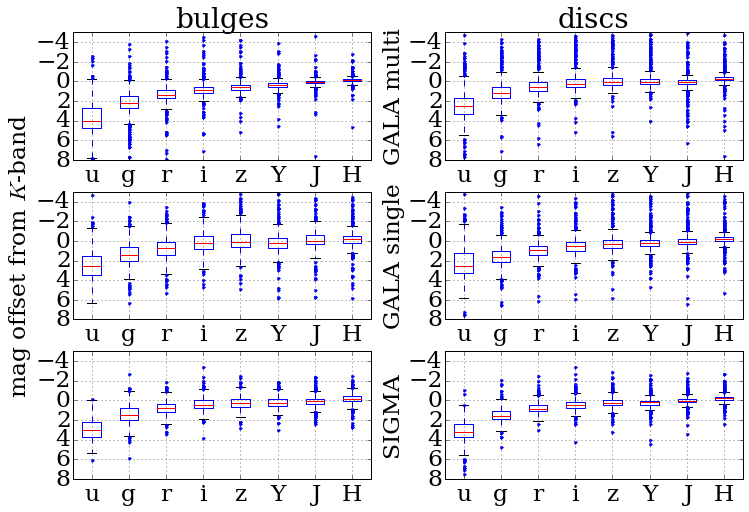

In [14]:
## produce boxplots

fig = plt.figure(figsize=(12,8))
def boxplot(d, label):
    if not hasattr(boxplot, "plotnum"):
        boxplot.plotnum = 0
    boxplot.plotnum += 1
    plt.subplot(3, 2, boxplot.plotnum)
    d.boxplot(sym='b.')
    plot_labels(boxplot.plotnum, label)
    plt.axis(ymin=8, ymax=-5)

boxplot(normsed_b, 'GALA multi')
boxplot(normsed_d, 'GALA multi')
boxplot(normsed_b_single, 'GALA single')
boxplot(normsed_d_single, 'GALA single')
boxplot(normsed_b_sigma, 'SIGMA')
boxplot(normsed_d_sigma, 'SIGMA')
plt.subplots_adjust(wspace=0.25, hspace=0.25)

In [15]:
## functions to produce nice asymmetric violin plots

## clip tails of the distributions to produce neater violins
from scipy.stats import scoreatpercentile
def clip(x, p=1):
    y = []
    for xi in x:
        p_lo = scoreatpercentile(xi, p)
        p_hi = scoreatpercentile(xi, 100-p)
        y.append(xi.clip(p_lo, p_hi))
    return y

## fancy legend text, which mimics the appearance of the violin plots
import matplotlib.patheffects as PathEffects
def outlined_text(x, y, text, color='k', rotation=0):
    ## \u2009 is a hairspace
    ## DejaVu Serif is specified as the default serif fonts on my system don't have this character
    plt.text(x, y, u'\u2009'.join(text), color='white', alpha=0.5,
             fontname='DejaVu Serif', rotation=rotation,
             path_effects=[PathEffects.withStroke(linewidth=2.5, foreground=color, alpha=1.0)])


## produce asymmetric violin plots
from statsmodels.graphics.boxplots import violinplot
def bdviolinplot(bm, bs, dm, ds, mtext='', stext=''):
    wl = np.log10(band_wl)*10
    vw = 0.5
    vlw = 1.5
    p = violinplot(clip(bm.T.values), labels=band_labels, positions=wl,
                   side='left', show_boxplot=False,
                   plot_opts={'violin_width':vw, 'violin_fc':'red',
                              'violin_ec':'darkred', 'violin_lw':vlw})
    p = violinplot(clip(bs.T.values), ax=plt.gca(), labels=band_labels,
                   positions=wl, side='right', show_boxplot=False,
                   plot_opts={'violin_width':vw, 'violin_fc':'red',
                              'violin_ec':'darkred', 'violin_lw':vlw})
    p = violinplot(clip(dm.T.values), ax=plt.gca(), labels=band_labels,
                   positions=wl, side='left', show_boxplot=False,
                   plot_opts={'violin_width':vw, 'violin_fc':'blue',
                              'violin_ec':'darkblue', 'violin_lw':vlw})
    p = violinplot(clip(ds.T.values), ax=plt.gca(), labels=band_labels, 
                   positions=wl, side='right', show_boxplot=False,
                   plot_opts={'violin_width':vw, 'violin_fc':'blue',
                              'violin_ec':'darkblue', 'violin_lw':vlw})

    ## overlay median trends
    plt.plot(wl, bm.median(), color='r', lw=2)
    plt.plot(wl, bs.median(), color='r', ls='--', lw=2)
    plt.plot(wl, dm.median(), color='b', lw=2)
    plt.plot(wl, ds.median(), color='b', ls='--', lw=2)

    ## tidy up
    plt.axis(ymin=8, ymax=-5)
    plt.ylabel('mag offset from $K$-band')
    plt.text(38.5, 7.3, '{} galaxies'.format(len(bm)))
    
    ## legend
    x, y = (41.0, 6.9)
    outlined_text(x, y, 'discs', 'darkblue')
    outlined_text(x, y+0.75, 'bulges', 'darkred')
    x, y = (x-0.35, 2.2)
    outlined_text(x, y, 'multi-band', '0.1', rotation=90)
    outlined_text(x+0.4, y, 'single-band', '0.1', rotation=90)
    outlined_text(x-0.3, y, mtext, '0.3', rotation=90)
    outlined_text(x+0.7, y, stext, '0.3', rotation=90)
    

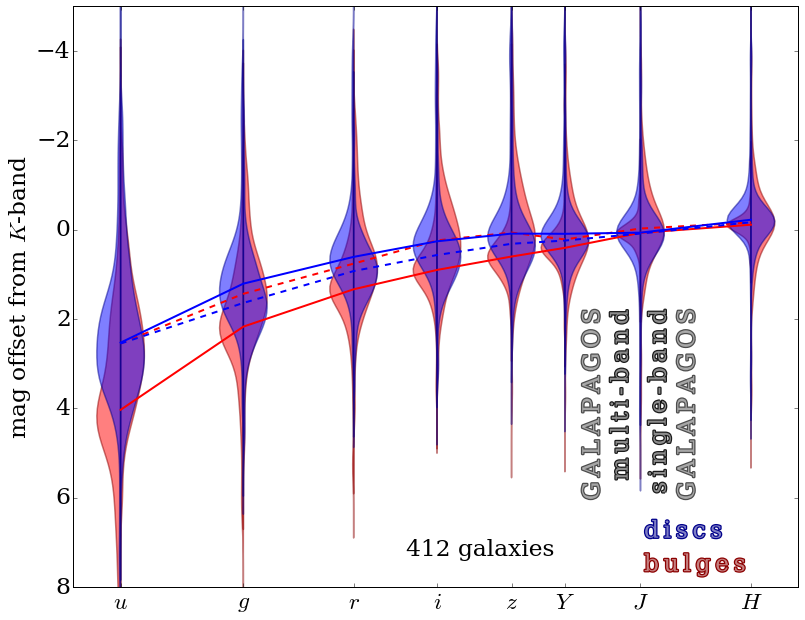

In [16]:
bdviolinplot(normsed_b, normsed_b_single, normsed_d, normsed_d_single,
             'GALAPAGOS', 'GALAPAGOS')

The figure is an asymmetric violin plot, which compares the distribution of disc and bulge SEDs with one another and between multi- and single-band fitting approaches.  For the multi-band fits, all the images were fit simultaneously, constrained to the same structural parameters, but with magnitude free to vary.  For the single-band fits, each image was fit completely independently.  All the fits were performed with GALAPAGOS and GALFITM, which allows a simple, fair comparison.  However, as SIGMA contains logic to retry fits which do not meet physical expectations, it is likely to perform somewhat differently.  The same sample used is ~400 galaxies with r < 18 mag and 0.025 < redshift < 0.06 for which none of the fits crashed (more sophisticated cleaning could certainly be done).  The SEDs are normalised to the K-band magnitude.

The disc data are shown in blue, while the bulge data are shown in red.  The shape of each side of a violin represents the distribution of magnitude offset for that band.  The left-side of each violin presents the multi-band fit results, while the right-sides present the single-band results.  The medians of each distribution are also plotted in their corresponding colour, with solid lines for multi-band and dashed lines for single-band results.

The single-band results do not distinguish very much between the SEDs of bulge and disc components, as can be seen from the coincidence between the dashed lines and the fact that the right-sides of the red and blue violins mostly overlap.

In constrast, the multi-band results show a significant difference in the SEDs of bulges and discs, in terms of both medians, and overall distributions.  Note that there is no colour difference between the components in the initial parameters.  The colour difference simply arises from the improved decomposition afforded by the multi-band approach.

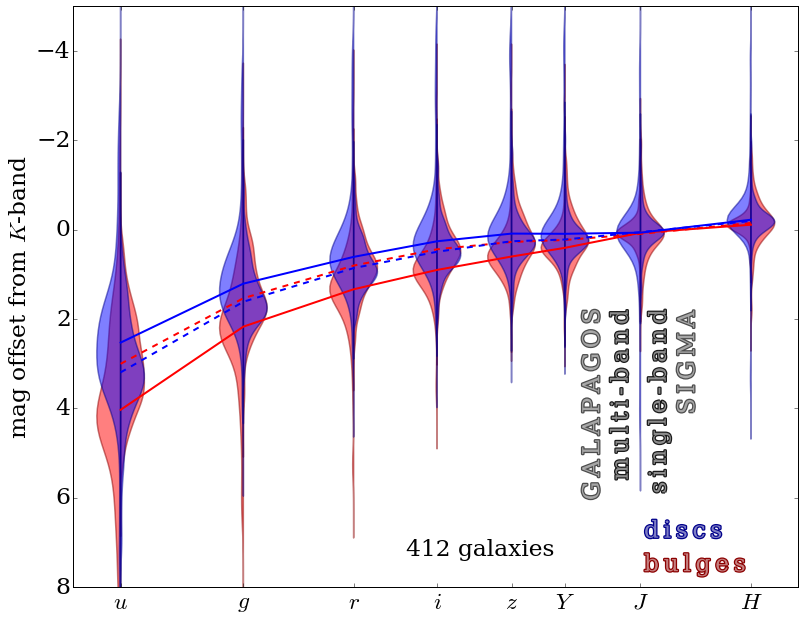

In [17]:
bdviolinplot(normsed_b, normsed_b_sigma, normsed_d, normsed_d_sigma,
             'GALAPAGOS', 'SIGMA')

The figure is the same as above, but now compares the GALAPAGOS multi-band fit results to single-band fits using SIGMA.  The SIGMA results show less scatter the the GALAPAGS single-band fits, but there is still very little differentiation between the SEDs of bulges and discs.